<a href="https://colab.research.google.com/github/milindlalwani/LPNA/blob/main/low_rank_approx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import math
import numpy as np
import numpy.linalg as la
import scipy.sparse as sp
import matplotlib.pyplot as plt

In [ ]:
p = 2564217863 # A large, random prime number
k_4 = np.random.randint(-2**31, 2**31, 4)
k_2 = np.random.randint(-2**31, 2**31, 2)

def kwise_hash(k, x):
    return np.polyval(k, x) % p

def h(x, k):
    return kwise_hash(k_2, x) % k

def sign(x):
    i = (kwise_hash(k_4, x) % 2)
    return [1., -1.][i]

def generate_count_sketch(k, m):
    S = np.zeros((k, m))
    for col in range(m):
        row = h(col, k)
        S[row, col] = sign(col)
    return S

def embedding_gaussian(s, m):
    """
    build an s by m matrix of i.i.d. Normal random variables. 
    Each element in the matrix has mean 0 and variance 1/s.
    """
    res = np.random.normal(0, 1/s, (s, m))
    return res


In [ ]:
print(generate_count_sketch(3,10))
# # A =
# #[
#  A[1],
# A[2],
# A[3],
# A[4]
# #]
# SA = 
# [
#  A[1] - A[3],
#  A[2] + A[4]
# ]

[[ 0.  0.  1.  0.  0. -1.  0.  0.  1.  0.]
 [ 0. -1.  0.  0.  1.  0.  0. -1.  0.  0.]
 [-1.  0.  0. -1.  0.  0.  1.  0.  0.  1.]]


In [ ]:
sketch_sizes = [550, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1500, 2000]
# Ax ~ b
# A has size m by n
# b has size m
# x has size n   
m, n = 3000, 100
A = np.random.rand(m, n)
b = np.random.rand(m)
list_relative_error = []

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


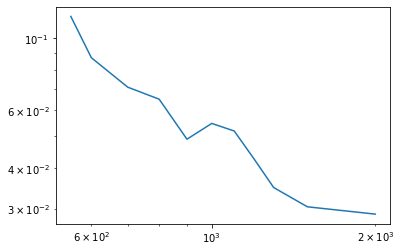

In [ ]:
#Plots one case relative error (||Ax-b|| - ||Ax_ref - b||) / (||Ax_ref - b||) as dimensions scale for gaussian embedding
for s in sketch_sizes: 
    S = embedding_gaussian(s, m)
    # min||SAx - Sb||
    x = la.lstsq(S @ A, S @ b)[0]
    x_ref = la.lstsq(A, b)[0]
    res = la.norm(A @ x - b)
    res_ref = la.norm(A @ x_ref - b)
    # (||Ax-b|| - ||Ax_ref - b||) / (||Ax_ref - b||)
    relative_error = np.abs(res_ref-res) / res_ref
    list_relative_error.append(relative_error)
plt.plot(sketch_sizes, list_relative_error)
plt.yscale('log')
plt.xscale('log')

# compare gaussian embedding and countsketch, try using different seeds to generate A and b, and then report the average error [fix n=100, m=3000, change s]
# gaussian embedding: fix m = 3000, fix s=3000, increase n from 5 to 200, check the error
# countsketch embedding: fix m = 3000, fix s=3000, increase n from 5 to 200, check the error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


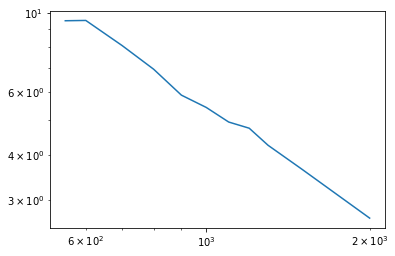

In [ ]:
#different seeds to generate A and b, and then report the average error [fix n=100, m=3000, change s]
m = 3000
n = 100
relative_errors = {}
for i in range(20): 
  for s in sketch_sizes: 
    S = embedding_gaussian(s, m)
    x = la.lstsq(S @ A, S @ b)[0]
    x_ref = la.lstsq(A, b)[0]
    res = la.norm(A @ x - b)
    res_ref = la.norm(A @ x_ref - b)
    # (||Ax-b|| - ||Ax_ref - b||) / (||Ax_ref - b||)
    relative_error = np.abs(res_ref-res) / res_ref
    #Insertion into dictionary according to whether that sketch_size has been previously seen
    if s in relative_errors: 
      relative_errors[s].append(relative_error)
    else: 
      relative_errors[s] = [relative_error]
  averages = []
  #Calculation for average relative_error for each respective sketch_size s
  for list_of_errors in relative_errors.values(): 
    #print((sum(list_of_errors), len(list_of_errors)))
    average = sum(list_of_errors) * 100 / len(list_of_errors)
    averages.append(average)
plt.plot(sketch_sizes, averages)
x_1 = sketch_sizes
y_1 = averages
#print(averages)
plt.xscale('log')
plt.yscale('log')


In [ ]:
sketch_sizes = [550, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1500, 1600, 1700, 2000]
# Ax ~ b
# A has size m by n
# b has size m
# x has size n   
m, n = 3000, 100
A = np.random.rand(m, n)
b = np.random.rand(m)
list_relative_error = []

/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:771: RuntimeWarning: overflow encountered in long_scalars
  y = y * x + p[i]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


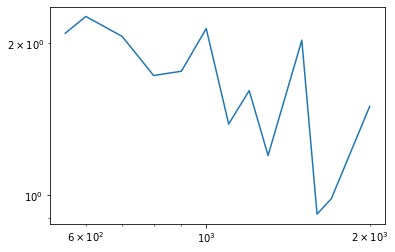

In [ ]:
for s in sketch_sizes: 
    S = generate_count_sketch(s, m)
    # min||SAx - Sb||
    x = la.lstsq(S @ A, S @ b)[0]
    x_ref = la.lstsq(A, b)[0]
    relative_error = la.norm(x_ref-x) / la.norm(x_ref)
    list_relative_error.append(relative_error)
plt.plot(sketch_sizes, list_relative_error)
plt.yscale('log')
plt.xscale('log')


/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:771: RuntimeWarning: overflow encountered in long_scalars
  y = y * x + p[i]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


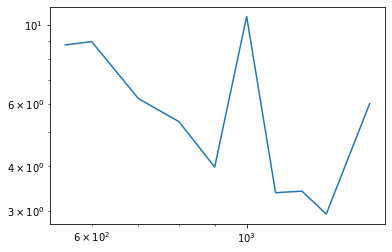

In [ ]:
#Plots average relative error (||Ax-b|| - ||Ax_ref - b||) / (||Ax_ref - b||) as dimensions scale for countsketch
sketch_sizes = [550, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1500]
# Ax ~ b
# A has size m by n
# b has size m
# x has size n   
m, n = 3000, 100
A = np.random.rand(m, n)
b = np.random.rand(m)
list_relative_error = []
relative_errors = {}
for i in range(20): 
  for s in sketch_sizes: 
    S = generate_count_sketch(s, m)
    x = la.lstsq(S @ A, S @ b)[0]
    x_ref = la.lstsq(A, b)[0]
    res = la.norm(A @ x - b)
    res_ref = la.norm(A @ x_ref - b)
    relative_error = np.abs(res_ref-res) / res_ref 
    if relative_error not in relative_errors: 
      relative_errors[s] = [relative_error]
    else: 
      relative_errors[s].append(relative_error)
  averages = []
  #Calculation for average relative_error for each respective sketch_size s
  for list_of_errors in relative_errors.values(): 
    #print((sum(list_of_errors), len(list_of_errors)))
    average = sum(list_of_errors) * 100 / len(list_of_errors)
    averages.append(average)
plt.plot(sketch_sizes, averages)
x_2, y_2 = sketch_sizes, averages
#print(averages)
plt.xscale('log')
plt.yscale('log')

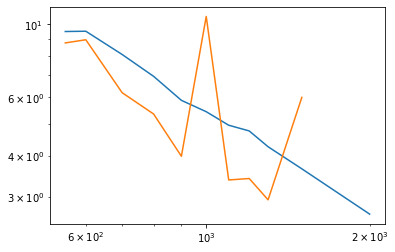

In [ ]:
plt.plot(x_1, y_1)
plt.plot(x_2, y_2)
plt.xscale('log')
plt.yscale('log')
#Blue is guassian
#Orange is countsketch

[5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


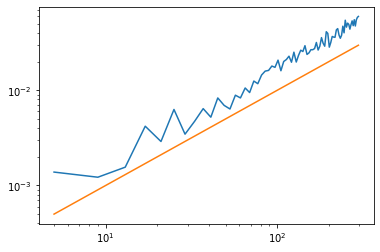

In [ ]:
# Gaussian embedding: fix m = 3000, fix s=3000
#Error n relation Plot Over n from 5 to 200
m = 3000
s = 3000
n = 5
list_relative_error = []
b = np.random.rand(m) 
n_values = [n for n in range(5, 300, 4)]
print(n_values)
scale = [v / 10000 for v in n_values]
for n in n_values: 
    A = np.random.rand(m, n)  
    S = embedding_gaussian(s, m)
    # min ||SAx - Sb||
    x = la.lstsq(S @ A, S @ b)[0]
    x_ref = la.lstsq(A, b)[0]
    res = la.norm(A @ x - b)
    res_ref = la.norm(A @ x_ref - b)
    relative_error = np.abs(res_ref-res) / res_ref
    list_relative_error.append(relative_error)
plt.plot(n_values, list_relative_error)
plt.plot(n_values, scale)
plt.yscale('log')
plt.xscale('log')

[5, 9, 13, 17, 21, 25, 29, 33, 37, 41, 45, 49, 53, 57, 61, 65, 69, 73, 77, 81, 85, 89, 93, 97, 101, 105, 109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157, 161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201, 205, 209, 213, 217, 221, 225, 229, 233, 237, 241, 245, 249, 253, 257, 261, 265, 269, 273, 277, 281, 285, 289, 293, 297]


/usr/local/lib/python3.7/dist-packages/numpy/lib/polynomial.py:771: RuntimeWarning: overflow encountered in long_scalars
  y = y * x + p[i]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  app.launch_new_instance()


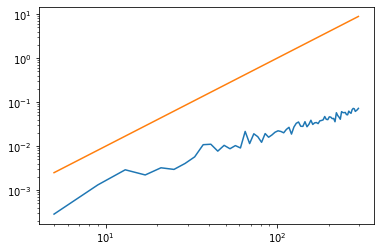

In [ ]:
# countsketch: fix m = 3000, fix s=3000
#Error n relation Plot Over n from 5 to 200
# A m x n, m fixed, n [5,200]
m = 3000
s = 3000
list_relative_error = []
b = np.random.rand(m) 
n_values = [n for n in range(5, 300, 4)]
print(n_values)
scale = [v * v / 10000 for v in n_values]
for n in n_values: 
    A = np.random.rand(m, n)
    S = generate_count_sketch(s, m)
    # min ||SAx - Sb||
    x = la.lstsq(S @ A, S @ b)[0]
    x_ref = la.lstsq(A, b)[0]
    res = la.norm(A @ x - b)
    res_ref = la.norm(A @ x_ref - b)
    relative_error = np.abs(res_ref-res) / res_ref
    list_relative_error.append(relative_error)
plt.plot(n_values, list_relative_error)
plt.plot(n_values, scale)
plt.yscale('log')
plt.xscale('log')

[2, 6, 10, 14, 18]
shape of A is: 6000 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


shape of A is: 6000 6
shape of A is: 6000 10
shape of A is: 6000 14
shape of A is: 6000 18
[2, 6, 10, 14, 18]
shape of A is: 6000 2
shape of A is: 6000 6
shape of A is: 6000 10
shape of A is: 6000 14
shape of A is: 6000 18
[2, 6, 10, 14, 18]
shape of A is: 6000 2
shape of A is: 6000 6
shape of A is: 6000 10
shape of A is: 6000 14
shape of A is: 6000 18
[2, 6, 10, 14, 18]
shape of A is: 6000 2
shape of A is: 6000 6
shape of A is: 6000 10
shape of A is: 6000 14
shape of A is: 6000 18
[2, 6, 10, 14, 18]
shape of A is: 6000 2
shape of A is: 6000 6
shape of A is: 6000 10
shape of A is: 6000 14
shape of A is: 6000 18
[2, 6, 10, 14, 18]
shape of A is: 6000 2
shape of A is: 6000 6
shape of A is: 6000 10
shape of A is: 6000 14
shape of A is: 6000 18
[2, 6, 10, 14, 18]
shape of A is: 6000 2
shape of A is: 6000 6
shape of A is: 6000 10
shape of A is: 6000 14
shape of A is: 6000 18
[2, 6, 10, 14, 18]
shape of A is: 6000 2
shape of A is: 6000 6
shape of A is: 6000 10
shape of A is: 6000 14
shape of

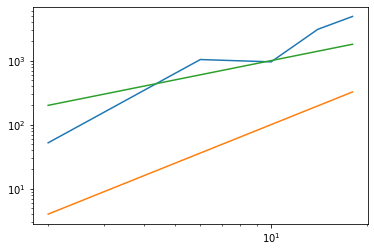

In [ ]:
import math

def sketch_size(A, b, epsilon):
    m, n = A.shape
    print("shape of A is:", m, n)
    ratio = 1.01
    sketchsize = 2
    relative_error = 2
    x_ref = la.lstsq(A, b)[0]
    res_ref = la.norm(A @ x_ref - b)
    while relative_error > epsilon:
        sketchsize = math.ceil(sketchsize * ratio)
        S = embedding_gaussian(sketchsize, m)
        x = la.lstsq(S @ A, S @ b)[0]
        res = la.norm(A @ x - b)
        relative_error = np.abs(res_ref-res) / res_ref
    return sketchsize

m = 6000
epsilon = 0.001
list_list_sketch_sizes = []
list_scale_quadratic = []
list_scale_linear = []
for i in range(10): 
    list_sketch_sizes = []
    b = np.random.rand(m) 
    n_values = [n for n in range(2, 20, 4)]
    print(n_values)
    scale_quadratic = [v * v for v in n_values]
    scale_linear = [v * 100 for v in n_values]
    for n in n_values: 
        A = np.random.rand(m, n)
        s = sketch_size(A, b, epsilon)
        S = embedding_gaussian(s, m)
        list_sketch_sizes.append(s)
    list_list_sketch_sizes.append(list_sketch_sizes)
    list_scale_quadratic.append(scale_quadratic)
    list_scale_linear.append(scale_linear)

sketch_size_list = [sum(x) / len(x) for x in zip(*list_list_sketch_sizes)]
scale_quadratic_list = [sum(x) / len(x) for x in zip(*list_scale_quadratic)]
scale_linear_list = [sum(x) / len(x) for x in zip(*list_scale_linear)]
plt.plot(n_values, list_sketch_sizes)
plt.plot(n_values, scale_quadratic)
plt.plot(n_values, scale_linear)
plt.yscale('log')
plt.xscale('log')